In [2]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [10]:
#List of temperatures as floats and strings
temp1 = [  290., 300.,  310.]
stemp1 = ["290", "292.5", "295", "297.5", "300", "302.5", "305", "307.5", "310"]

t = len(temp1)

(3, 64, 8192)
(3, 64, 8192)
(3, 64, 8192)


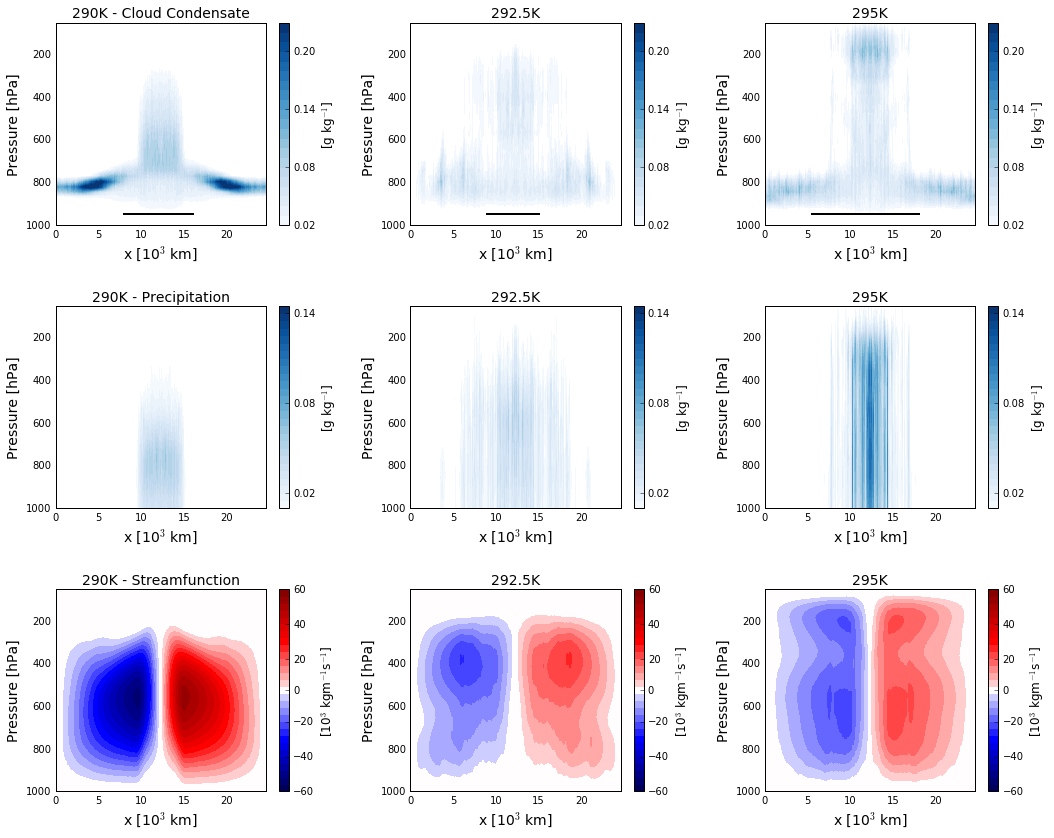

In [11]:
t = len( temp1 )

var = ["QN", "QP", "U"] #Variables to use
v = len( var )

labs = [ "g kg$^{-1}$", "g kg$^{-1}$", "10$^3$ kgm$^{-1}$s$^{-1}$" ] #Colorbar labels
labels = [ "Cloud Condensate", "Precipitation", "Streamfunction" ] #panel labels

def streamfunction( u, p ):
    #Calculate overturning streamfunction
    d1, d2 = np.shape( u )
    s = np.zeros( ( d1, d2 ) )

    for i in range( 1, d1 ):
        s[ i, :] += np.trapz( u[:i, :], p[:i] * 100., axis = 0 )

    return s / 9.8

#Colorbar scales:
v1 = np.arange( 0.02, 0.24, .01 )
v2 = np.arange(  0.01, 0.15, .005 )
v3 = np.arange( -60., 64., 4. )
#Remove 0 contour
ov3 = v3[:] 
v3 = np.zeros( len( ov3 ) - 1 )
v3[:len( ov3 ) / 2] = ov3[:len( ov3 ) / 2]
v3[len( ov3 ) / 2:] = ov3[len( ov3 ) / 2 + 1:]

#Widths of precipitation > 2mm/day
width = np.zeros( ( 3, 2 ) )
width[0] = [9., 15.]
width[1] = [5.5, 18.]
width[2] = [8., 16.]

fig = plt.figure( figsize = (15, 12) )
plt.subplots_adjust(left = 0.07, right = 0.97, bottom = 0.06, top = 0.95, hspace = 0.4, wspace = 0.35)

b = 0 #For keeping track of where the figures go

fig_place = [1, 2, 3, 4, 5, 6, 7, 8, 9]
press = np.load( "data/2D_mock_walker_press.dat")


for i in range( 3 ):
    a = 0 #For plotting the precip bars
    dat = np.load( "data/2D_mock_walker_data_" + var[i] + ".dat" )
    print np.shape( dat )
    for j in range( 3 ):
        ax = plt.subplot(3, 3, fig_place[b] )
        if j == 0:
            plt.title( stemp1[j] + "K" + " - " + labels[i], fontsize = 14 )
        else:
            plt.title( stemp1[j] + "K", fontsize = 14 )

        x = np.linspace( 0., len(dat[0, 0] ) * 3., len(dat[0, 0] ) )

        if i == 0:
            dat[j] = (dat[j, :, :] + dat[j, :, ::-1]) / 2. #Symmetrize
            plt.contourf( x / 1000., press[j, i], dat[j], v1, cmap = plt.cm.Blues )
            cb = plt.colorbar( ticks = np.arange( 0.02, 0.26, 0.06) )
            y = [950., 950.]
            plt.plot( width[a - 1], y, 'k', linewidth = 2. )
        elif i == 1:
            dat[j] = (dat[j, :, :] + dat[j, :, ::-1]) / 2. #Symmetrize
            plt.contourf( x / 1000., press[j, i], dat[j], v2, cmap = plt.cm.Blues )
            cb = plt.colorbar( ticks = np.arange( 0.02, 0.26, 0.06) )
        elif i == 2:
            dat[j] = (dat[j, :, :] - dat[j, :, ::-1]) / 2. #Symmetrize
            st = streamfunction( dat[j], press[j, i] )
            plt.contourf( x / 1000., press[j, i], st / 1000., v3, cmap = plt.cm.seismic )
            cb = plt.colorbar(ticks = np.arange( -60., 80., 20.))

        cb.set_label("[" + labs[i] + "]", fontsize = 12)

        plt.ylim([1000., 50.])
        plt.xlim([0., max(x) / 1000.])

        plt.xlabel("x [10$^3$ km]", fontsize = 14)
        plt.ylabel("Pressure [hPa]", fontsize = 14)

        ax.tick_params(axis = 'x', which = 'both', bottom="off", top = "off", labelbottom = "on")                  
        ax.tick_params(axis="y", which="both", bottom="off", top="off",  labelbottom="off", left="off", right="off", labelleft="on")    

        a += 1
        b += 1

plt.show()

In [15]:
def make_axis( ax ):

	ax.tick_params( axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = 'out')                  
	ax.tick_params( axis = 'y', which = 'both', bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = 'out')                                                                                        

	ax.tick_params(length = 5, which = 'both')

	ax.spines["top"].set_visible(False)    

	majorLocator = MultipleLocator(5)
	minorLocator = MultipleLocator(2.5)
	ax.xaxis.set_major_locator(majorLocator)
	ax.xaxis.set_minor_locator(minorLocator)

	plt.xlabel("x [10$^3$ km]", fontsize = 14)

	majorLocator = MultipleLocator(0.2)
	minorLocator = MultipleLocator(0.1)
	ax.yaxis.set_major_locator(majorLocator)
	ax.yaxis.set_minor_locator(minorLocator)

	plt.ylim([0., 0.9])
	plt.xlim([0., 24.5])

	return ax

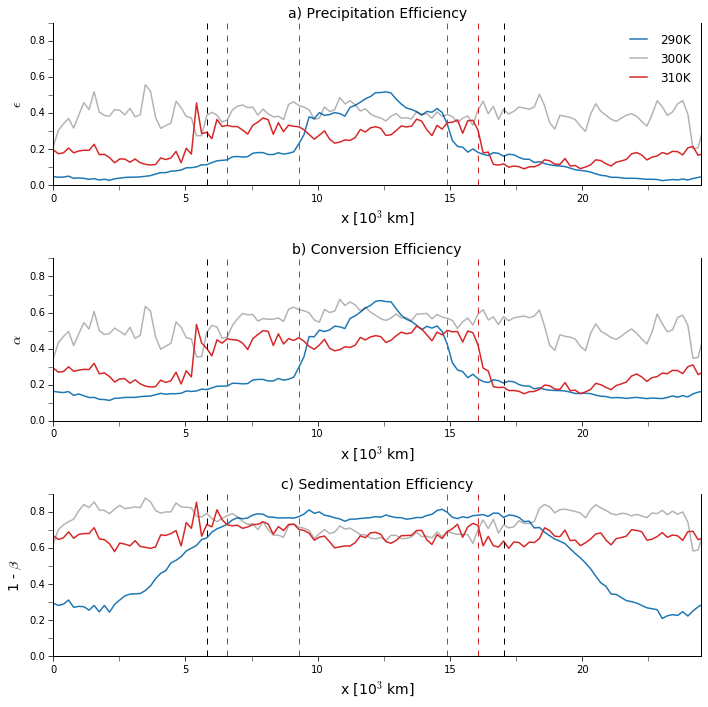

In [16]:
#The regional analysis is performed using the 2D output files, with the calculations performed analogously to the precip
#efficiency notebook. Here I load the regional quantities and plot them.
n_pe = np.load( "data/2D_Walker_regional_pe.dat" )
n_evp = np.load( "data/2D_Walker_regional_evp.dat" )
w500 = np.load( "data/2D_Walker_regional_w500.dat" )
n_alpha = n_pe + n_evp

k = len( n_pe[0] )
nx = np.linspace(0., 24.576, k )


cs = [(31 / 255., 119 / 255., 180 / 255.), (0. / 255., 0 / 255., 0 / 255.), (214 / 255., 39 / 255., 40 / 255.), (255 / 255., 127 / 255., 14 / 255.) ]
a = [ 1., 0.3, 1. ]

fig = plt.figure( figsize = (10, 10) )
plt.subplots_adjust(left = 0.07, right = 0.97, bottom = 0.07, top = 0.95, hspace = 0.45, wspace = 0.4)

ax = plt.subplot(3, 1, 1)
plt.title("a) Precipitation Efficiency", fontsize = 14 )

for i in range( t ):
    plt.plot( nx , n_pe[i], color = cs[i], linewidth = 1.5, alpha = a[i] )

plt.legend(["290K", "300K", "310K"], frameon = False, loc = "upper right", ncol = 1 )

for i in range( t ):
    b = 0
    for j in range( k - 10 ):
        if w500[i, j] < 0. and w500[i, j + 1] > 0.  and w500[i, j + 10] > 0 and b == 0:
            plt.axvline( x = nx[j], color = cs[i], linestyle = '--' )
            b = 1
        if w500[i, j] > 0. and w500[i, j + 1] < 0.  and w500[i, j + 10] < 0.:
            plt.axvline( x = nx[j], color = cs[i], linestyle = '--' )
            break

make_axis( ax )
plt.ylabel( "$\epsilon$", fontsize = 14 )

ax = plt.subplot(3, 1, 2)
plt.title("b) Conversion Efficiency", fontsize = 14 )

for i in range( t ):
    plt.plot( nx, n_alpha[i], color = cs[i], linewidth = 1.5, alpha = a[i] )
    
for i in range( t ):
    b = 0
    for j in range( k - 10 ):
        if w500[i, j] < 0. and w500[i, j + 1] > 0.  and w500[i, j + 10] > 0 and b == 0:
            plt.axvline( x = nx[j], color = cs[i], linestyle = '--' )
            b = 1
        if w500[i, j] > 0. and w500[i, j + 1] < 0.  and w500[i, j + 10] < 0.:
            plt.axvline( x = nx[j], color = cs[i], linestyle = '--' )
            break
make_axis( ax )
plt.ylabel( "$\\alpha$", fontsize = 14 )

ax = plt.subplot(3, 1, 3)
plt.title("c) Sedimentation Efficiency", fontsize = 14 )

for i in range( t ):
    plt.plot( nx, 1. - n_evp[i] / n_alpha[i], color = cs[i], linewidth = 1.5, alpha = a[i] )
    
for i in range( t ):
    b = 0
    for j in range( k - 10 ):
        if w500[i, j] < 0. and w500[i, j + 1] > 0.  and w500[i, j + 10] > 0 and b == 0:
            plt.axvline( x = nx[j], color = cs[i], linestyle = '--' )
            b = 1
        if w500[i, j] > 0. and w500[i, j + 1] < 0.  and w500[i, j + 10] < 0.:
            plt.axvline( x = nx[j], color = cs[i], linestyle = '--' )
            break

make_axis( ax )
plt.ylabel( "1 - $\\beta$", fontsize = 14 )

plt.show() 

